<a href="https://colab.research.google.com/github/doraemonidol/bert-crf/blob/master/ner_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/Colab/bert-crf')

In [3]:
import torch.cuda

from re_utils.train import train_ner

In [4]:
#In data/Chinese_couplet_dataset_traditional.txt, each line is a sentence with punctuation. Help me to generate texts and labels
# labeled_texts.jsonl – the file consists of lines, each line has the following form:

# {"input_ids": [113, 1947, 672, 73324, ..., 152, 64306], "text_labels": ["O", "O", "B-QUA", "I-QUA", ..., "O", "O"], "labels": [0, 0, 15, 10, ..., 0, 0], "id": 0}
# id – index of a piece of text in the dataset
# input_ids – token ids received by the tokenizer
# text_labels – named entity labels for tokens. Labels are assigned to tokens according to the BIO system: in this case, if the token does not belong to the named entity, then it is marked with the "O" label; the label of the first named entity token is prefixed with "B-"; other named entity tokens begin with "I-". The corresponding prefix is followed by a tag denoting the class of the named entity.
# labels – text_labels converted to numbers

def load_data(file_path):
    texts, labels = [], []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            text = line.replace(' ', '')
            label = []
            i = 0
            while (i + 1 < len(text)):
                if text[i + 1] in ['，', '。', '？', '！']:
                    label.append(1)
                    i += 1
                else:
                    label.append(0)
                i += 1
            text = text.replace('，', '').replace('。', '').replace('？', '').replace('！', '')
            # print(text, label)
            # break
            texts.append(text)
            labels.append(label)
    return texts, labels

def construct_jsonl(file_path):
    texts, labels = load_data(file_path)
    texts = texts[:10000]
    labels = labels[:10000]
    train_text = texts[:int(len(texts) * 0.8)]
    train_label = labels[:int(len(texts) * 0.8)]
    test_text = texts[int(len(texts) * 0.8):]
    test_label = labels[int(len(texts) * 0.8):]
    with open(f'/content/gdrive/MyDrive/Colab/bert-crf/data/labeled_texts_train.jsonl', 'w') as f:
        for i in range(len(train_text)):
            line = train_text[i]

            input_ids = []
            for c in line:
                input_ids.append(ord(c))

            f.write('{"input_ids": %s, "text_labels": %s, "labels": %s, "id": %d}\n' % (input_ids, train_label[i], train_label[i], i))

    with open(f'/content/gdrive/MyDrive/Colab/bert-crf/data/labeled_texts_test.jsonl', 'w') as f:
        for i in range(len(test_text)):
            line = test_text[i]

            input_ids = []
            for c in line:
                input_ids.append(ord(c))

            f.write('{"input_ids": %s, "text_labels": %s, "labels": %s, "id": %d}\n' % (input_ids, test_label[i], test_label[i], i))

def construct_jsonl_2(file_path):
    texts, labels = load_data(file_path)
    texts = texts[:1000]
    labels = labels[:1000]
    train_text = texts[:int(len(texts) * 0.8)]
    train_label = labels[:int(len(texts) * 0.8)]
    test_text = texts[int(len(texts) * 0.8):]
    test_label = labels[int(len(texts) * 0.8):]
    with open(f'/content/gdrive/MyDrive/Colab/bert-crf/data/labeled_texts_train.jsonl', 'w') as f:
        for i in range(len(train_text)):
            line = train_text[i]

            input_ids = []
            for c in line:
                input_ids.append(ord(c))

            f.write('{"input_ids": %s, "text_labels": %s, "labels": %s, "id": %d}\n' % (input_ids, train_label[i], train_label[i], i))

    with open(f'/content/gdrive/MyDrive/Colab/bert-crf/data/labeled_texts_test.jsonl', 'w') as f:
        for i in range(len(test_text)):
            line = test_text[i]

            input_ids = []
            for c in line:
                input_ids.append(ord(c))

            f.write('{"input_ids": %s, "text_labels": %s, "labels": %s, "id": %d}\n' % (input_ids, test_label[i], test_label[i], i))



In [5]:
construct_jsonl_2(r'/content/gdrive/MyDrive/Colab/bert-crf/data/train.txt')

In [6]:
num_labels = 2
train_tokenized_texts_path = "/content/gdrive/MyDrive/Colab/bert-crf/data/labeled_texts_train.jsonl"
test_tokenized_texts_path = "/content/gdrive/MyDrive/Colab/bert-crf/data/labeled_texts_test.jsonl"
dropout = 0.2
batch_size = 16
epochs = 15
log_every = 20
lr_new_layers = 1e-3
lr_bert = 1e-5
device = "xla"
print(f"Device: {device}")

Device: xla


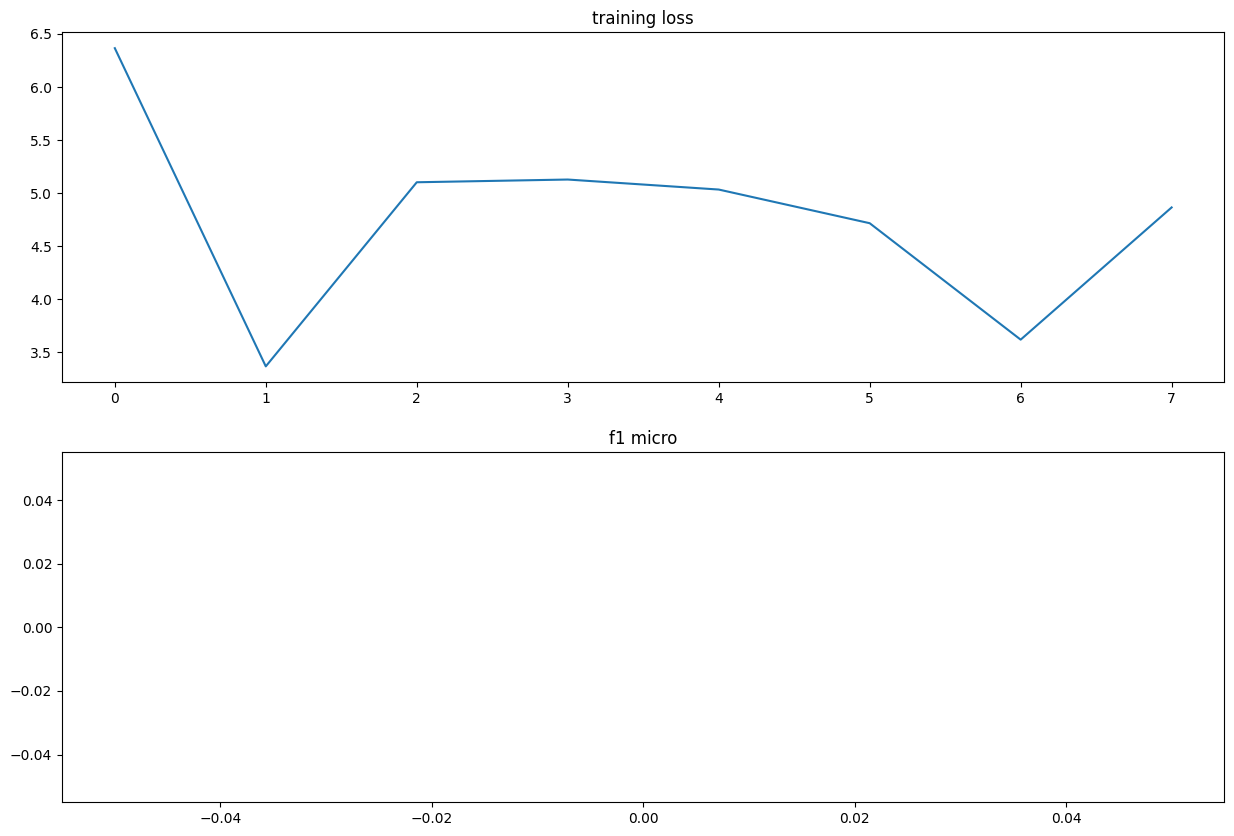

 16%|█▌        | 8/50 [18:42<2:22:19, 203.33s/it]

Current loss: 4.863589286804199
Epoch 1/15


 16%|█▌        | 8/50 [23:57<2:05:45, 179.67s/it]


KeyboardInterrupt: 

In [7]:
# rurebus-bert + crf

train_ner(
    num_labels=num_labels,
    bert_name='bert-base-chinese',
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=True,
    save_to='/content/gdrive/MyDrive/Colab/bert-crf/model/bert-base-chinese.pt',
    device=device
)